In [72]:
import numpy as np
import torch
import torch.nn.functional as F

from analyst import Analyst
from config import ModelConfig, TrainerConfig
from dataset import load_dataset_manager

In [85]:
torch.manual_seed(24)
np.random.seed(24)

trainer_config = TrainerConfig(
    dataset_name="toydata", epochs=3, ignore_saved_model=True, load_model=False, batch_size=16
)
model_config = ModelConfig(d_model=64, lr=0.00001, add_seq_embedding=True)

In [86]:
trainer_config

TrainerConfig(model_name='attentive2', dataset_name='toydata', epochs=3, batch_size=16, verbose=False, ignore_saved_model=True, load_model=False, save_model=True, load_dataset=True, save_dataset=True, cache_dir='cache/', dataset_dir='cache/dataset/')

In [87]:
model_config

ModelConfig(d_model=64, max_embedding_norm=None, window_size=8, negative_sample_size=5, lr=5e-05, use_learnable_embedding=True, dropout=0.1, add_seq_embedding=True, add_positional_encoding=False)

In [18]:
dataset_manager = load_dataset_manager(
    dataset_name=trainer_config.dataset_name,
    dataset_dir=trainer_config.dataset_dir,
    load_dataset=trainer_config.load_dataset,
    save_dataset=trainer_config.save_dataset,
    window_size=model_config.window_size,
)

load cached dataset_manager from: cache/dataset/toydata.pickle


KeyboardInterrupt: 

In [88]:
analyst = Analyst(
    dataset_manager=dataset_manager,
    trainer_config=trainer_config,
    model_config=model_config,
)

In [89]:
def on_epoch_start():
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "M", "genre", method="inner-product", num_top_values=30
    )
    analyst.similarity_between_seq_meta_and_item_meta(
        "gender", "F", "genre", method="inner-product", num_top_values=30
    )
    analyst.visualize_meta_embedding("gender", "genre", method="pca")
    # print(analyst.trainer.model.embedding_seq_meta.weight[6])
    # print(analyst.trainer.model.embedding_seq_meta.weight[7])
    print(F.cosine_similarity(analyst.trainer.model.embedding_seq_meta.weight[6], analyst.trainer.model.embedding_seq_meta.weight[7], dim=0))
    # print(analyst.trainer.model.embedding_item_meta.weight[15])
    # print(analyst.trainer.model.Qk.weight[0])

train start
similarity of seq meta: gender:M for meta: genre
0.0871 E5
0.0468 E1
-0.0134 F2
-0.0440 M3
-0.0482 E3
-0.0575 F4
-0.0577 F3
-0.0594 M5
-0.0606 M4
-0.0652 F5
-0.0728 M2
-0.0843 E2
-0.1026 F1
-0.1050 M1
-0.1303 E4
similarity of seq meta: gender:F for meta: genre
0.0869 E4
0.0600 F4
0.0514 M4
0.0354 E3
0.0251 F5
0.0226 M1
0.0175 F3
0.0165 M5
0.0033 M2
-0.0013 E2
-0.0069 F1
-0.0239 F2
-0.0485 M3
-0.0681 E1
-0.0777 E5


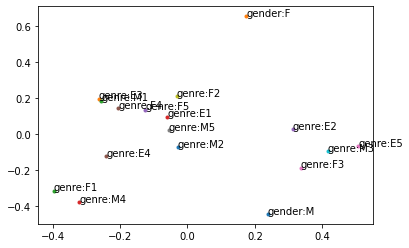

tensor(-0.2375, grad_fn=<DivBackward0>)


100%|██████████| 6750/6750 [00:04<00:00, 1415.14it/s]


Epoch: 1, loss: 0.2755543513109541, test_loss: {'test': 0.28926319132690076}
saved best model to cache/best-toydata-attentive2.pt
similarity of seq meta: gender:M for meta: genre
363.9510 F4
359.1454 F1
357.3235 F3
357.1515 F2
353.5854 F5
270.4706 E1
265.9458 E2
261.6313 E4
259.7496 E5
259.6725 E3
22.0712 M3
18.0355 M4
16.9484 M5
15.8122 M2
8.8386 M1
similarity of seq meta: gender:F for meta: genre
327.8516 F4
323.0938 F1
321.1729 F2
320.9277 F3
318.1994 F5
242.7782 E1
239.0684 E2
235.6251 E4
233.2591 E3
233.0471 E5
18.7817 M3
15.5151 M4
14.6508 M5
13.4273 M2
7.4902 M1


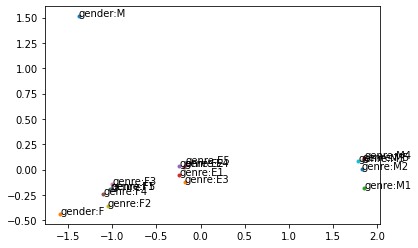

tensor(0.8322, grad_fn=<DivBackward0>)


 16%|█▌        | 4576/29250 [00:21<02:00, 205.12it/s]

In [90]:
analyst.fit(show_fig=False, on_epoch_start=on_epoch_start)
on_epoch_start()